In [1]:
import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# CDR(Clinical dementia rating)
Based on Memory, 
Orientation, 
Judgment and problem sloving, 
Community affairs, 
Home and hobby, 
Personal care, 


In [2]:
FolderName = glob.glob('/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/Cognitive_Test_Battery_LEMON/*')
CogTestBatName = [item.split('/')[-1] if item.split('/')[-1][-1] != '_' else item.split('/')[-1][:-1] for item in FolderName]
# CogTestBatName

CsvList = glob.glob('/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/Cognitive_Test_Battery_LEMON/*/*.csv')
CogTestBat = []
for i in CsvList:
    TempPd = pd.read_csv(i)
    CogTestBat.append(TempPd)
# CogTestBat

for i,j in zip(CogTestBatName, CogTestBat):
    print(i, j)

CVLT      Unnamed: 0  CVLT_1  CVLT_2  CVLT_3  CVLT_4  CVLT_5  CVLT_6  CVLT_7  \
0    sub-032311       1       7    16.0   1.075   0.226    60.0    58.0   
1    sub-032309       1       9    11.0  -1.644   1.226    53.0    51.0   
2    sub-032382       1       6    12.0  -1.286   0.672    48.0    48.0   
3    sub-032302       1       9    15.0  -1.644   0.426    63.0    60.0   
4    sub-032315       1       7    13.0   0.502   0.117    53.0    51.0   
..          ...     ...     ...     ...     ...     ...     ...     ...   
223  sub-032304       1       9     7.0  -1.071   0.608    43.0    42.0   
224  sub-032439       1       8    15.0   0.574   0.426    62.0    61.0   
225  sub-032440       1      10    16.0  -1.000   0.226    72.0    71.0   
226  sub-032441       1       6    10.0  -0.141   1.426    49.0    48.0   
227  sub-032525       1       7     7.0  -0.642   3.798    45.0    44.0   

     CVLT_8  CVLT_9  CVLT_10  CVLT_11  CVLT_12  CVLT_13  CVLT_14  CVLT_15  \
0         8      

In [3]:
CogTestBatName

['CVLT',
 'RWT',
 'TMT',
 'TAP_Incompatibility',
 'TAP_Alertness',
 'WST',
 'LPS',
 'TAP_Working_Memory']

In [4]:
CogTestBat[2].describe()

,TMT_1,TMT_2,TMT_3,TMT_5,TMT_6,TMT_7
count,227.000000,227.000000,227.000000,228.000000,228.000000,228.000000
mean,29.836872,1.726872,0.233480,63.339693,1.548246,0.407895
std,11.389166,0.849430,0.626218,26.659287,0.871652,0.821157
min,10.910000,1.000000,0.000000,24.130000,1.000000,0.000000
25%,22.420000,1.000000,0.000000,44.787500,1.000000,0.000000
50%,27.160000,2.000000,0.000000,56.920000,1.000000,0.000000
75%,35.705000,2.000000,0.000000,75.562500,2.000000,1.000000
max,78.340000,4.000000,4.000000,161.150000,4.000000,5.000000


In [5]:
# exluse ssub-032339

CogTestBat[2].iloc[45:55,:]

,Unnamed: 0,TMT_1,TMT_2,TMT_3,TMT_4,TMT_5,TMT_6,TMT_7,TMT_8
45,sub-032335,28.13,2.0,0.0,NaN,64.81,1,0,NaN
46,sub-032337,28.00,2.0,0.0,NaN,47.66,1,0,NaN
47,sub-032339,NaN,NaN,NaN,NaN,99.00,3,0,NaN
48,sub-032306,31.09,2.0,0.0,NaN,60.00,1,0,NaN
49,sub-032338,40.53,3.0,0.0,NaN,104.00,3,1,NaN
50,sub-032340,39.12,2.0,0.0,NaN,93.68,3,1,NaN
51,sub-032341,33.31,2.0,0.0,NaN,113.19,3,2,NaN
52,sub-032442,43.13,3.0,0.0,NaN,157.87,4,1,participant confused the number one and the le...
53,sub-032347,31.92,2.0,0.0,NaN,91.92,3,0,NaN
54,sub-032444,36.00,2.0,0.0,NaN,42.63,1,0,NaN


In [55]:
# TMT

df = CogTestBat[2]
df = df[~df['Unnamed: 0'].isin(['sub-032339'])]
df_id = df['Unnamed: 0'].tolist()
df_TMT = df
exclude = ['TMT_4', 'TMT_8']
columns = df.columns[1:-1].values
columns = [item for item in columns.tolist() if item not in exclude]
# print(columns)
CustomMin = [5, 1, 0, 10, 1, 0]
CustomMax = [85, 4, 25, 170, 4, 13]
print(df[columns])
df2array = df[columns].values
MinMax = np.array([CustomMin, CustomMax])
mmscaler = MinMaxScaler(feature_range=(0, 1), copy=True)
mmscaler.fit(MinMax.astype('float'))
scaled_sample = mmscaler.transform(df2array)

print(scaled_sample)
# df['CVLT_1'].tolist()

     TMT_1  TMT_2  TMT_3  TMT_5  TMT_6  TMT_7
0    10.91    1.0    0.0  24.13      1      0
1    26.47    1.0    0.0  54.44      1      0
2    14.10    1.0    1.0  37.63      1      0
3    18.06    1.0    0.0  36.50      1      0
4    23.38    1.0    0.0  34.10      1      0
..     ...    ...    ...    ...    ...    ...
223  55.07    4.0    0.0  98.75      3      1
224  19.25    1.0    0.0  40.07      1      0
225  25.34    1.0    0.0  44.35      1      0
226  34.91    2.0    0.0  60.28      1      0
227  24.25    1.0    0.0  56.94      1      0

[227 rows x 6 columns]
[[0.073875   0.         0.         0.0883125  0.         0.        ]
 [0.268375   0.         0.         0.27775    0.         0.        ]
 [0.11375    0.         0.04       0.1726875  0.         0.        ]
 ...
 [0.25425    0.         0.         0.2146875  0.         0.        ]
 [0.373875   0.33333333 0.         0.31425    0.         0.        ]
 [0.240625   0.         0.         0.293375   0.         0.        ]]


In [42]:
scaled_sample

array([[0.073875  , 0.        , 0.        , 0.0883125 , 0.        ,
        0.        ],
       [0.268375  , 0.        , 0.        , 0.27775   , 0.        ,
        0.        ],
       [0.11375   , 0.        , 0.25      , 0.1726875 , 0.        ,
        0.        ],
       ...,
       [0.25425   , 0.        , 0.        , 0.2146875 , 0.        ,
        0.        ],
       [0.373875  , 0.33333333, 0.        , 0.31425   , 0.        ,
        0.        ],
       [0.240625  , 0.        , 0.        , 0.293375  , 0.        ,
        0.        ]])

In [56]:
pca = PCA(n_components=2, whiten=False)
pca.fit(scaled_sample)
X_pca = pca.fit_transform(scaled_sample)

In [57]:
for index, i in enumerate(X_pca.T[0]):
    print(index, df_id[index], i)

0 sub-032311 -0.4233983000486103
1 sub-032309 -0.29657643847340714
2 sub-032382 -0.3809183296952993
3 sub-032302 -0.36865674114515073
4 sub-032315 -0.35425474043925
5 sub-032314 -0.3580782414052716
6 sub-032316 -0.3225960605494504
7 sub-032383 -0.30539638858455226
8 sub-032307 -0.3429975268217723
9 sub-032310 -0.36937742224641434
10 sub-032312 0.22586481150160176
11 sub-032317 -0.282150699342171
12 sub-032404 -0.3928136963016059
13 sub-032318 0.45008282184593973
14 sub-032319 -0.057630539861663034
15 sub-032386 -0.3319172066363005
16 sub-032320 -0.3608787224681683
17 sub-032321 -0.3636522477890524
18 sub-032322 -0.03571176923775996
19 sub-032394 -0.3571812085172121
20 sub-032324 -0.10995393775264745
21 sub-032323 -0.29287625171789633
22 sub-032528 -0.31491859860235744
23 sub-032325 -0.37093590690263706
24 sub-032313 -0.30078519060279646
25 sub-032405 -0.33808077251130814
26 sub-032384 -0.3861372058505141
27 sub-032407 -0.34899158830507165
28 sub-032327 -0.35435642841940806
29 sub-03241

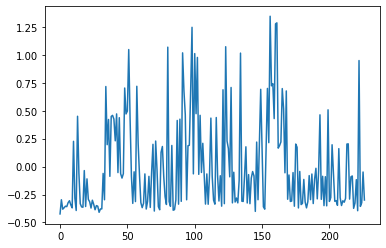

In [58]:
plt.plot(X_pca.T[0])

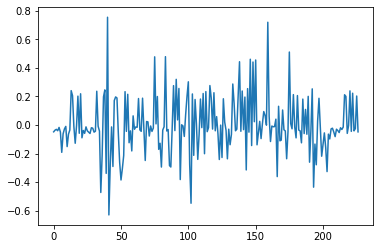

In [46]:
plt.plot(X_pca.T[1])

In [47]:
pca.explained_variance_ratio_

array([0.65746572, 0.14646592])

In [48]:
X_pca.T[0].shape

(227,)

In [15]:
# Get cognitive status

Cog_score = pd.read_csv("/workspace/brail_poc3/notebooks/Chen/TestCognitive.csv")
Cog_score = Cog_score.loc[:, ["ID", "Label"]]
Age_data = pd.read_csv("/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")
Age_data = Age_data.loc[:, ["Subject", "Age"]]
Age_data = Age_data.rename({'Subject': 'ID'}, axis='columns')

def convert_age_range(age_range):
    # ハイフンで文字列を分割し、最初の部分を取得
    return int(age_range.split("-")[0])

Age_data["Age_1"] = Age_data["Age"].apply(convert_age_range)
Age_data.drop("Age", axis=1, inplace=True)

cog_df = Cog_score.merge(Age_data, on='ID', how='left')
ground_truth = cog_df[cog_df['Age_1'] >= 40]
Elder_group = ground_truth['ID'].tolist()

GT1 = ground_truth[ground_truth["Label"] == 1]
GT2 = ground_truth[ground_truth["Label"] == 2]

In [22]:
cog_df2 = Cog_score.merge(Age_data, on='ID', how='right')
cog_df2 = cog_df2[~cog_df2['ID'].isin(['sub-032339'])]
cog_df2 = cog_df2.reset_index(drop=True)

In [23]:
cog_df2

,ID,Label,Age_1
0,sub-032311,0.0,20
1,sub-032309,2.0,20
2,sub-032382,0.0,25
3,sub-032302,0.0,20
4,sub-032315,0.0,20
...,...,...,...
222,sub-032304,1.0,25
223,sub-032439,0.0,20
224,sub-032440,0.0,25
225,sub-032441,2.0,25


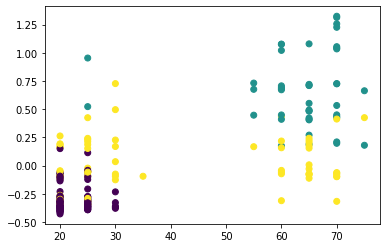

In [49]:
# 散布図

X = cog_df2['Age_1']
y = X_pca.T[0]
label = cog_df2['Label']
plt.scatter(X, y, c=label)

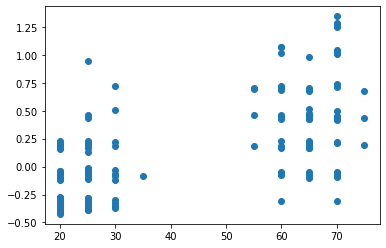

In [26]:
X = cog_df2['Age_1']
y = X_pca.T[0]
plt.scatter(X, y)

In [27]:
cog_df2

,ID,Label,Age_1
0,sub-032311,0.0,20
1,sub-032309,2.0,20
2,sub-032382,0.0,25
3,sub-032302,0.0,20
4,sub-032315,0.0,20
...,...,...,...
222,sub-032304,1.0,25
223,sub-032439,0.0,20
224,sub-032440,0.0,25
225,sub-032441,2.0,25


In [50]:
ground_truth = cog_df2[cog_df2['Age_1'] < 40]
ground_truth
under20 = [value for index, value in enumerate(X_pca.T[0]) if index in ground_truth.index.tolist()]
for index, i in enumerate(under20):
    print(index, ground_truth.iloc[index, 0], i)

0 sub-032311 -0.42905402285972555
1 sub-032309 -0.3032493440887902
2 sub-032382 -0.38823671481137834
3 sub-032302 -0.37477283731933847
4 sub-032315 -0.36066098482686487
5 sub-032314 -0.36419572848901144
6 sub-032316 -0.28139633833925315
7 sub-032307 -0.349401106086879
8 sub-032310 -0.37694585561554717
9 sub-032312 0.26243588692177805
10 sub-032317 -0.2887033827519273
11 sub-032404 -0.39879422894142147
12 sub-032319 -0.0676391603695994
13 sub-032386 -0.33853993496000695
14 sub-032320 -0.3431286271506112
15 sub-032321 -0.37010221356849193
16 sub-032322 -0.04585100768556137
17 sub-032394 -0.3632375664082758
18 sub-032324 -0.11968443518819809
19 sub-032323 -0.27714238468099556
20 sub-032528 -0.3214394958222002
21 sub-032325 -0.3768891986002775
22 sub-032313 -0.310042200254522
23 sub-032405 -0.34441303581771154
24 sub-032384 -0.3920450092950745
25 sub-032407 -0.35509471799210907
26 sub-032327 -0.3607437927540011
27 sub-032414 -0.41624694463129397
28 sub-032418 -0.38476652904908526
29 sub-03

In [51]:
ground_truth = cog_df2[cog_df2['Age_1'] > 40]
ground_truth
over50 = [value for index, value in enumerate(X_pca.T[0]) if index in ground_truth.index.tolist()]
for index, i in enumerate(over50):
    print(index, ground_truth.iloc[index, 0], i)

0 sub-032383 -0.31179713574365836
1 sub-032318 0.43578518226582574
2 sub-032415 -0.07396358750541718
3 sub-032331 0.7246612263760345
4 sub-032305 0.1878051984676482
5 sub-032308 0.40994124828119893
6 sub-032428 -0.09692669060623393
7 sub-032333 0.434431076654262
8 sub-032430 0.4926924054761677
9 sub-032301 0.4049455338134464
10 sub-032303 0.2698689761458592
11 sub-032336 0.4831195666821156
12 sub-032329 0.006468761476876347
13 sub-032431 0.44956347320912093
14 sub-032335 -0.07318913716852928
15 sub-032337 -0.11250175708113848
16 sub-032306 -0.07320555901797902
17 sub-032338 0.711564597142272
18 sub-032340 0.48253614958153684
19 sub-032341 0.5327127160039468
20 sub-032442 1.054416207500346
21 sub-032347 0.4247525122543833
22 sub-032343 0.24235614652326803
23 sub-032342 -0.03858321408206209
24 sub-032369 1.0756813264292007
25 sub-032372 0.425032248593555
26 sub-032373 0.4098893186701724
27 sub-032443 -0.3175011623754818
28 sub-032376 1.02116333036493
29 sub-032374 0.6632693843121323
30 s

In [30]:
cog_df2

,ID,Label,Age_1
0,sub-032311,0.0,20
1,sub-032309,2.0,20
2,sub-032382,0.0,25
3,sub-032302,0.0,20
4,sub-032315,0.0,20
...,...,...,...
222,sub-032304,1.0,25
223,sub-032439,0.0,20
224,sub-032440,0.0,25
225,sub-032441,2.0,25


In [59]:
cog_df2['TMT'] = X_pca.T[0]

targetCol = 'TMT_1'
cog_df2[targetCol] = df_TMT[targetCol].reset_index(drop=True)
bins = np.linspace(-0.8, 1.7, 26)
scores = cog_df2['TMT']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['TMT_bins'] = pd.cut(cog_df2['TMT'], bins)
bin_means = cog_df2.groupby('TMT_bins')[targetCol].max()
bin_means

TMT_bins
(-0.8, -0.7]      NaN
(-0.7, -0.6]      NaN
(-0.6, -0.5]      NaN
(-0.5, -0.4]    12.97
(-0.4, -0.3]    26.88
(-0.3, -0.2]    26.97
(-0.2, -0.1]    33.40
(-0.1, 0.0]     39.72
(0.0, 0.1]        NaN
(0.1, 0.2]      48.13
(0.2, 0.3]      51.44
(0.3, 0.4]        NaN
(0.4, 0.5]      56.03
(0.5, 0.6]      39.25
(0.6, 0.7]      46.28
(0.7, 0.8]      51.13
(0.8, 0.9]        NaN
(0.9, 1.0]      55.07
(1.0, 1.1]      78.34
(1.1, 1.2]        NaN
(1.2, 1.3]      59.00
(1.3, 1.4]      71.81
(1.4, 1.5]        NaN
(1.5, 1.6]        NaN
(1.6, 1.7]        NaN
Name: TMT_1, dtype: float64

In [60]:
cog_df2['TMT'] = X_pca.T[0]

targetCol = 'TMT_1'
cog_df2[targetCol] = df_TMT[targetCol].reset_index(drop=True)
bins = np.linspace(-0.8, 1.7, 26)
scores = cog_df2['TMT']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['TMT_bins'] = pd.cut(cog_df2['TMT'], bins)
bin_means_CVLT_6 = cog_df2.groupby('TMT_bins')[targetCol].max()

targetCol = 'TMT_3'
cog_df2[targetCol] = df_CVLT[targetCol].reset_index(drop=True)
bins = np.linspace(-0.8, 1.7, 26)
scores = cog_df2['TMT']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['TMT_bins'] = pd.cut(cog_df2['TMT'], bins)
bin_means_CVLT_9 = cog_df2.groupby('TMT_bins')[targetCol].max()

targetCol = 'TMT_5'
cog_df2[targetCol] = df_CVLT[targetCol].reset_index(drop=True)
bins = np.linspace(-0.8, 1.7, 26)
scores = cog_df2['TMT']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['TMT_bins'] = pd.cut(cog_df2['TMT'], bins)
bin_means_CVLT_11 = cog_df2.groupby('TMT_bins')[targetCol].max()

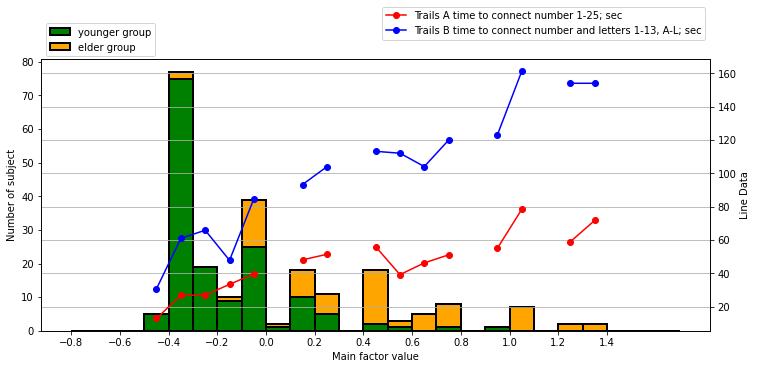

In [62]:
# 度数分布表  of pd

bins = np.linspace(-0.8, 1.7, 26)
scores = pd.Series(X_pca.T[0])
freq = scores.value_counts(bins=bins, sort=False)
class_value = [round(i, 2) for i in (bins[:-1] + bins[1:]) / 2]  # 階級値
rel_freq = freq / scores.count()  # 相対度数
cum_freq = freq.cumsum()  # 累積度数
rel_cum_freq = rel_freq.cumsum()  # 相対累積度数

scores20 = pd.Series(under20)
freq20 = scores20.value_counts(bins=bins, sort=False)
class_value20 = [round(i, 2) for i in (bins[:-1] + bins[1:]) / 2]  # 階級値
rel_freq20 = freq20 / scores20.count()  # 相対度数
cum_freq20 = freq20.cumsum()  # 累積度数
rel_cum_freq20 = rel_freq20.cumsum()  # 相対累積度数

scores50 = pd.Series(over50)
freq50 = scores50.value_counts(bins=bins, sort=False)
class_value50 = [round(i, 2) for i in (bins[:-1] + bins[1:]) / 2]  # 階級値
rel_freq50 = freq50 / scores50.count()  # 相対度数
cum_freq50 = freq50.cumsum()  # 累積度数
rel_cum_freq50 = rel_freq50.cumsum()  # 相対累積度数

dist = pd.DataFrame(
    {
        "階級値": class_value,
        "度数": freq,
        "相対度数": rel_freq,
        "累積度数": cum_freq,
        "相対累積度数": rel_cum_freq,
    },
    index=freq.index
)

fig, ax = plt.subplots(figsize=[12,5])

ax.bar(class_value20, freq20, color="green", ec="k", width=0.1, lw=2, label='younger group')
ax.bar(class_value50, freq50, color="orange", ec="k", width=0.1, lw=2, bottom=freq20, label='elder group')
ax.set_ylabel('Number of subject')
ax.set_xlabel('Main factor value')
ax.set_xticks(np.arange(-1, 1.5, 0.2))
ax.legend(bbox_to_anchor=(0, 1.15), loc='upper left')

ax2 = ax.twinx()
ax2.plot(class_value20, bin_means_CVLT_6, marker='o', color='red', linestyle='-', label='Trails A time to connect number 1-25; sec')
# ax2.plot(class_value20, bin_means_CVLT_9, marker='o', color='yellow', linestyle='-', label='Correct recalls (short delay); Max 16')
ax2.plot(class_value20, bin_means_CVLT_11, marker='o', color='blue', linestyle='-', label='Trails B time to connect number and letters 1-13, A-L; sec')
ax2.legend(bbox_to_anchor=(1, 1.21), loc='upper right')
ax2.set_ylabel('Line Data')
plt.grid()
plt.show()

In [63]:
cog_df2

,ID,Label,Age_1,TMT,TMT_1,TMT_bins,TMT_3,TMT_5
0,sub-032311,0.0,20,-0.423398,10.91,"(-0.5, -0.4]",0.0,24.13
1,sub-032309,2.0,20,-0.296576,26.47,"(-0.3, -0.2]",0.0,54.44
2,sub-032382,0.0,25,-0.380918,14.10,"(-0.4, -0.3]",1.0,37.63
3,sub-032302,0.0,20,-0.368657,18.06,"(-0.4, -0.3]",0.0,36.50
4,sub-032315,0.0,20,-0.354255,23.38,"(-0.4, -0.3]",0.0,34.10
...,...,...,...,...,...,...,...,...
222,sub-032304,1.0,25,0.948453,55.07,"(0.9, 1.0]",0.0,98.75
223,sub-032439,0.0,20,-0.356117,19.25,"(-0.4, -0.3]",0.0,40.07
224,sub-032440,0.0,25,-0.323686,25.34,"(-0.4, -0.3]",0.0,44.35
225,sub-032441,2.0,25,-0.048483,34.91,"(-0.1, 0.0]",0.0,60.28


In [64]:
cog_df2.to_csv('VSSR.csv')

In [55]:
Meta = pd.read_csv('/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv')
Meta
# Meta.shape[0]

,Subject,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Unnamed: 7,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",...,SKID_Diagnoses 1,SKID_Diagnoses 2,Comments_SKID_assessment,Hamilton_Scale,BSL23_sumscore,BSL23_behavior,AUDIT,Standard_Alcoholunits_Last_28days,Alcohol_Dependence_In_1st-3rd_Degree_relative,Relationship_Status
0,sub-032311,2,20-25,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,47,No,No
1,sub-032309,2,20-25,right,Gymnasium,negative,0,NaN,occasional smoker,2.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,45,Yes,Yes
2,sub-032382,2,25-30,right,Gymnasium,negative,0,NaN,occasional smoker,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,0.0,12,unknown,Yes
3,sub-032302,1,20-25,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,3.0,NaN,NaN,1.0,0,No,No
4,sub-032315,2,20-25,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,2.0,NaN,NaN,7.0,22,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,sub-032304,2,25-30,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,4.0,0.0,1.0,1,No,No
224,sub-032439,2,20-25,left,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,"suspected diagnosis: panic disorder, alcohol a...",1.0,4.0,1.0,5.0,18,no,no
225,sub-032440,2,25-30,left,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,5.0,2.0,1.0,3.0,29,no,yes
226,sub-032441,2,25-30,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:300.29 #DESC: Mild Specific phobia #SPEC...,NaN,subclinical specific phobia,3.0,3.0,1.0,3.0,"16,5",no,yes


In [58]:
CogTestBatDic = []
for i in range(Meta.shape[0]):
    TempDic = {}
    TempDic['SubNum'] = Meta['Subject'][i] # ID追加, SubNum
    
    for index_j, j in enumerate(CogTestBat):
        
    
    CogTestBatDic.append(TempDic)
CogTestBatDic

[{'SubNum': 'sub-032311'},
 {'SubNum': 'sub-032309'},
 {'SubNum': 'sub-032382'},
 {'SubNum': 'sub-032302'},
 {'SubNum': 'sub-032315'},
 {'SubNum': 'sub-032314'},
 {'SubNum': 'sub-032316'},
 {'SubNum': 'sub-032383'},
 {'SubNum': 'sub-032307'},
 {'SubNum': 'sub-032310'},
 {'SubNum': 'sub-032312'},
 {'SubNum': 'sub-032317'},
 {'SubNum': 'sub-032404'},
 {'SubNum': 'sub-032318'},
 {'SubNum': 'sub-032319'},
 {'SubNum': 'sub-032386'},
 {'SubNum': 'sub-032320'},
 {'SubNum': 'sub-032321'},
 {'SubNum': 'sub-032322'},
 {'SubNum': 'sub-032394'},
 {'SubNum': 'sub-032324'},
 {'SubNum': 'sub-032323'},
 {'SubNum': 'sub-032528'},
 {'SubNum': 'sub-032325'},
 {'SubNum': 'sub-032313'},
 {'SubNum': 'sub-032405'},
 {'SubNum': 'sub-032384'},
 {'SubNum': 'sub-032407'},
 {'SubNum': 'sub-032327'},
 {'SubNum': 'sub-032414'},
 {'SubNum': 'sub-032418'},
 {'SubNum': 'sub-032326'},
 {'SubNum': 'sub-032415'},
 {'SubNum': 'sub-032332'},
 {'SubNum': 'sub-032331'},
 {'SubNum': 'sub-032305'},
 {'SubNum': 'sub-032308'},
 